# Building price Model

In [517]:
import pandas as pd
import numpy as np

In [518]:
housing = pd.read_csv("housing.csv")

In [519]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [520]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


used to find missing data

In [521]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [522]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [523]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [524]:
%matplotlib inline

In [525]:
import matplotlib.pyplot as pyplot


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

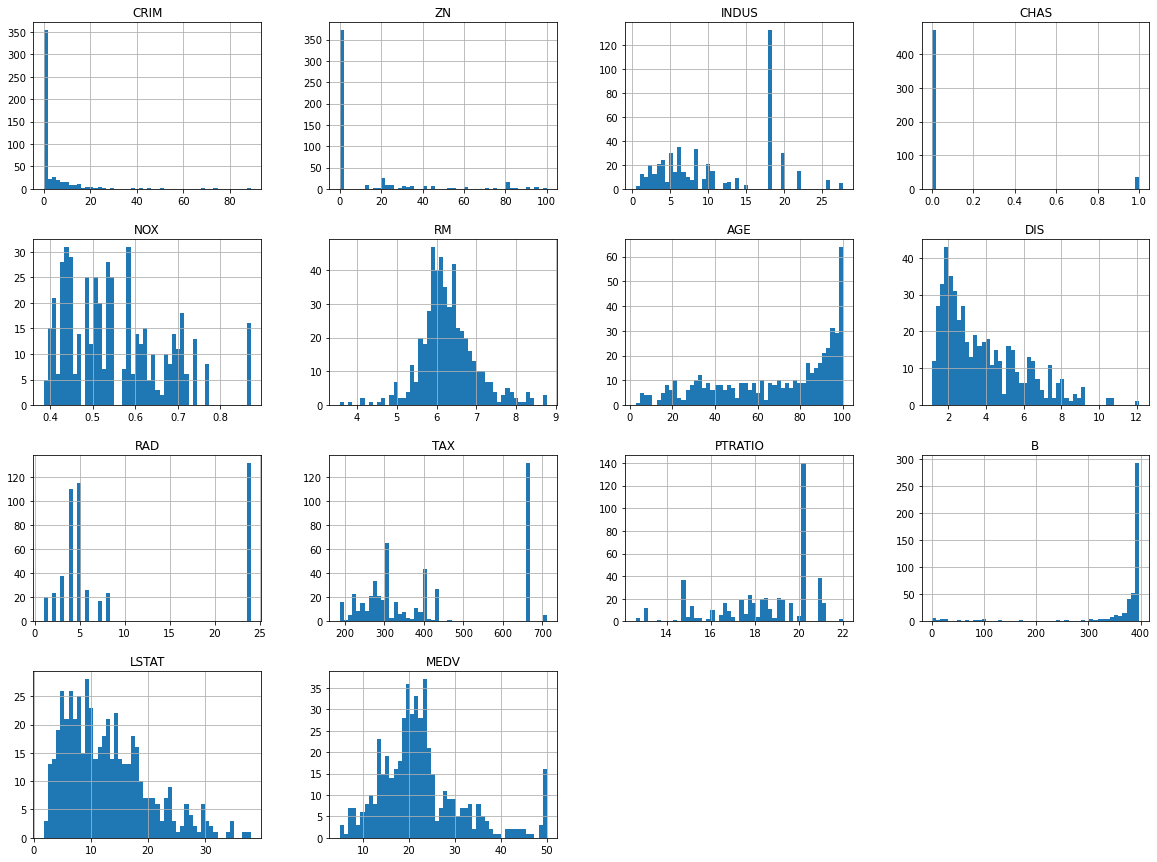

In [526]:
housing.hist(bins=50, figsize=(20,15))
# bins is for width of the bars plotted in the histogram

# Train - test split manual

In [527]:
np.random.seed(1)
def split_train_test(data,test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [528]:
train_set, test_set = split_train_test(housing,0.2)

In [529]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 405
Rows in test set: 101


## Train_test_split using sklearn inbuild library

In [530]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 1)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


making chas available in train and test

In [531]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state = 1)
#print(split.split(housing, housing['CHAS']))
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [532]:
# strat_train_set
# strat_test_set
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.312893,9.000000,11.530686,0.068627,0.560304,6.248725,71.148039,3.511365,9.519608,401.205882,18.457843,346.418137,13.109118,22.764706
std,6.278366,20.566723,6.889082,0.254068,0.113186,0.777279,26.373455,1.837919,8.605467,171.484280,2.196732,106.049950,7.469183,10.209398
min,0.019510,0.000000,1.380000,0.000000,0.392000,3.863000,6.500000,1.178100,1.000000,188.000000,13.000000,7.680000,1.730000,7.400000
25%,0.092845,0.000000,5.695000,0.000000,0.469750,5.856500,52.725000,1.967900,4.000000,267.000000,17.400000,370.685000,7.402500,15.400000
50%,0.340460,0.000000,9.795000,0.000000,0.538000,6.147000,79.300000,3.003800,5.000000,322.000000,19.050000,390.705000,11.990000,21.300000
75%,2.808720,0.000000,18.100000,0.000000,0.629250,6.760500,93.275000,4.691525,20.000000,666.000000,20.200000,396.900000,17.850000,27.075000
max,37.661900,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [533]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 109 to 261
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [534]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [535]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

# Looking for correlaitions

In [536]:
corr_matrix = housing.corr()

In [537]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [538]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [539]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

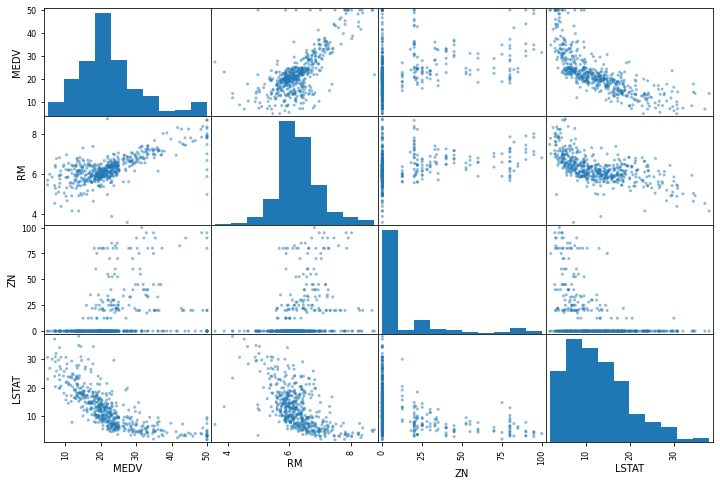

In [540]:
attributes = ['MEDV','RM','ZN',"LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [541]:
housing['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
25.0      10
22.0      10
40.0       7
30.0       6
45.0       6
90.0       5
95.0       4
21.0       4
60.0       4
33.0       4
28.0       3
52.5       3
75.0       3
34.0       3
35.0       3
70.0       3
55.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

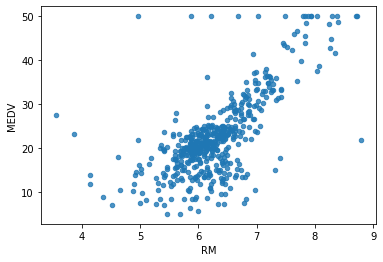

In [542]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

# Attribute Combinations

In [543]:
housing['TAXRM'] = housing["TAX"]/housing['RM']

In [544]:
housing['TAXRM']

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [545]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [546]:
corr_matrix = housing.corr()

In [547]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.587899
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.337028
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.721423
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.056486
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.664994
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.510150
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.510628
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.535744
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.864230
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.957401


In [548]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

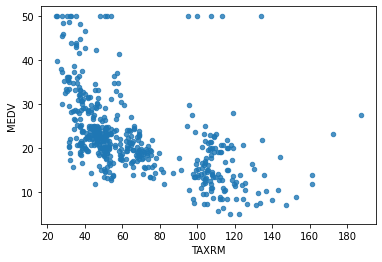

In [549]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.8)

<AxesSubplot:xlabel='MEDV', ylabel='TAXRM'>

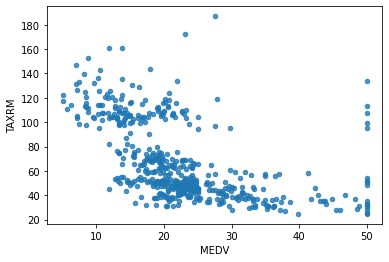

In [550]:
housing.plot(kind='scatter',y='TAXRM',x='MEDV',alpha=0.8)

In [551]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()
print(housing_labels)

99     33.2
54     18.9
229    31.5
403     8.3
395    13.1
       ... 
251    24.8
504    22.0
441    17.1
166    50.0
505    11.9
Name: MEDV, Length: 404, dtype: float64


# Making machine learning model from now on

In [552]:
# housing = strat_train_set.copy()
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
99,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80
229,0.44178,0.0,6.20,0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12


## Feature Scaling

2 methods
1. Min-max  =  (value-min)/(max-min)
        
        MinMaxScaler




2. Standardization  =  (value-mean)/std. deviation
        
        result have variance 1
        
        StandardScaler

## Creating Pipeline


In [553]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [554]:
my_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy = 'median')),
        ('std_scaler', StandardScaler()),

    ]
)

In [555]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [556]:
housing_num_tr

array([[-0.39839795, -0.49991153, -1.18946524, ..., -0.21092547,
         0.43247526, -0.90016071],
       [-0.40444957,  2.63488136, -1.0274113 , ...,  1.22630554,
         0.43247526,  0.32077193],
       [-0.3573371 , -0.49991153, -0.70622331, ..., -0.48909921,
         0.24218739, -1.24474448],
       ...,
       [ 0.66400162, -0.49991153,  1.03111176, ...,  0.80904492,
         0.30676576,  0.99008692],
       [-0.18476558, -0.49991153,  1.24718368, ..., -1.74088106,
         0.1153288 , -1.25325272],
       [-0.40072947, -0.49991153,  0.13032543, ...,  1.17994325,
         0.43247526, -0.66051191]])

In [557]:
housing_num_tr.shape

(404, 13)

## Selecting and training model


### Linear Regression Model

In [558]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [559]:
some_data = housing.iloc[:5]

In [560]:
some_labels = housing_labels.iloc[:5]

In [561]:
prepared_data = my_pipeline.transform(some_data)

In [562]:
model.predict(prepared_data)

array([32.43616955, 15.32694323, 31.40612192, 12.2987463 , 19.8231572 ])

In [563]:
np.array(some_labels)

array([33.2, 18.9, 31.5,  8.3, 13.1])

#### Evaluating The linear model

In [564]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [565]:
lin_rmse

4.5651293129991775

#### trying cross-validation for linear regression model

In [566]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [567]:
rmse_scores

array([4.84662578, 4.29648839, 5.80216893, 3.61091834, 4.2034101 ,
       5.59510099, 4.29958815, 5.4056491 , 4.27468252, 5.19564507])

In [568]:
def print_score(scores):
    print("Scores",scores)
    print("Mean:", scores.mean())
    print("Std. Deviation:",scores.std())

In [569]:
print_score(rmse_scores)

Scores [4.84662578 4.29648839 5.80216893 3.61091834 4.2034101  5.59510099
 4.29958815 5.4056491  4.27468252 5.19564507]
Mean: 4.75302773529039
Std. Deviation: 0.6848148036681116


### Decision Treee Regressor Model

In [570]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

#### Repeating steps from above!

In [571]:
model.fit(housing_num_tr,housing_labels)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)
np.array(some_labels)
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [572]:
mse

0.0

👆🏻 This is over fitting as this is giving error as 0.00

Using better evaluating technique
using Cross validation

In [573]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [574]:
rmse_scores

array([4.25595709, 3.59772964, 7.90495368, 3.74276538, 3.47044666,
       3.07619895, 6.2480797 , 3.04963113, 4.60667993, 4.03627303])

In [575]:
def print_score(scores):
    print("Scores",scores)
    print("Mean:", scores.mean())
    print("Std. Deviation:",scores.std())

In [576]:
print_score(rmse_scores)

Scores [4.25595709 3.59772964 7.90495368 3.74276538 3.47044666 3.07619895
 6.2480797  3.04963113 4.60667993 4.03627303]
Mean: 4.398871518955447
Std. Deviation: 1.4632654657092234


### Random Forest Model

In [578]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [579]:
model.fit(housing_num_tr,housing_labels)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)
np.array(some_labels)
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [580]:
mse

1.4082687896039607

In [581]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [582]:
rmse_scores

array([3.97163408, 3.02724364, 5.64984306, 2.96171343, 2.35148276,
       2.95358894, 3.41161558, 2.44944102, 2.06300325, 3.21623634])

In [583]:
def print_score(scores):
    print("Scores",scores)
    print("Mean:", scores.mean())
    print("Std. Deviation:",scores.std())

In [584]:
print_score(rmse_scores)

Scores [3.97163408 3.02724364 5.64984306 2.96171343 2.35148276 2.95358894
 3.41161558 2.44944102 2.06300325 3.21623634]
Mean: 3.2055802119505286
Std. Deviation: 0.9677452718637336
